In [29]:
import pandas as pd

In [30]:
review = pd.read_parquet("review.parquet")
business = pd.read_parquet("business.parquet")
user = pd.read_parquet("user.parquet")

## Review Dataset cleaning

In [31]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [32]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [33]:
# check duplicated values
review.duplicated().sum()

0

In [34]:
# check missing values
review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [35]:
!pip install nltk

In [36]:
# text data preprocessing 
'''
Text Preprocessing Steps
	•	Remove unnecessary special characters and extra spaces
	•	Convert all text to lowercase
	•	Remove numbers and HTML tags
	•	Eliminate stopwords (e.g., “the,” “is,” “at,” etc.)
	•	Perform lemmatization (extracting the root form of words) or stemming to normalize words
'''
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'<.*?>', '', text)  
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # 불용어 제거 & 표제어 추출
    return text

review['clean_text'] = review['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
# count review length to check correlation with business poerformance
review['review_length'] = review['clean_text'].apply(lambda x: len(x.split()))

In [38]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,clean_text,review_length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,decide eat aware going take hour beginning end...,43
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,ive taken lot spin class year nothing compare ...,82
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,family diner buffet eclectic assortment large ...,39
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,wow yummy different delicious favorite lamb cu...,23
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,cute interior owner gave u tour upcoming patio...,63


## Business Dataset Cleaning

In [39]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [40]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [41]:
business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [42]:
business['business_id'].duplicated().sum()

0

In [43]:
# convert null in 'attributes' col into empty dic {} 
business['attributes'] = business['attributes'].fillna("{}")

In [44]:
# drop null in 'categories' col 
business = business.dropna(subset=['categories'])

In [45]:
# convert null in 'hours' col into 'Unknown'
business['hours'].fillna("Unknown", inplace=True)

In [46]:
business.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [47]:
# drop useless columns
business.drop(columns=['is_open'])

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",Unknown
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Nail Salons, Beauty & Spas","{'Friday': '10:0-19:30', 'Monday': '10:0-19:30..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Friday': '9:30-17:30', 'Monday': '9:30-17:30..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",Unknown
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', '..."


## User Dataset Cleaning

In [48]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [49]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [50]:
user.duplicated().sum()

0

In [51]:
user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [52]:
# drop useless columns 
user.drop(columns=['yelping_since', 'friends', 'elite'])

,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987892,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,7,0,0,0,4.92,0,0,0,0,0,0,0,0,0,0,0
1987893,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1987894,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,1,1,0,0,2.00,0,0,0,0,0,0,0,0,0,0,0
1987895,ulfGl4tdbrH05xKzh5lnog,Susanne,2,0,0,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0


## EDA

/var/tmp/ipykernel_221945/867610413.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  review   = pd.read_csv("clean_review.csv")
/var/tmp/ipykernel_221945/867610413.py:17: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  user     = pd.read_csv("clean_user.csv")


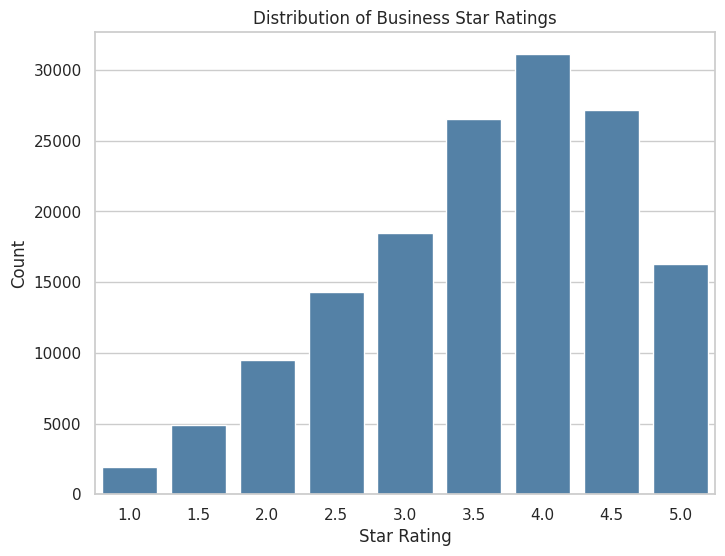

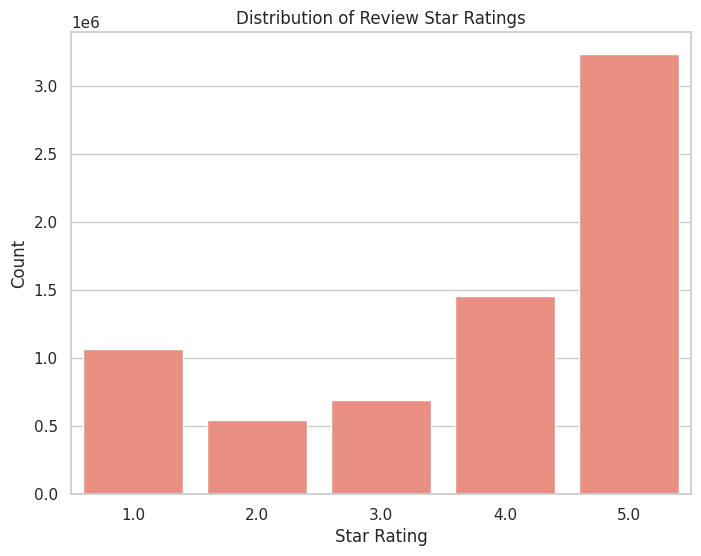

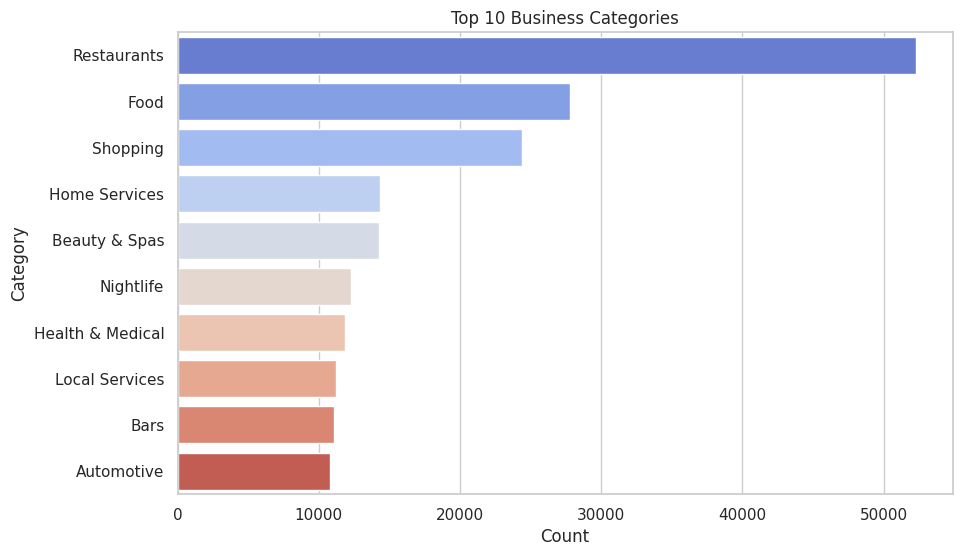

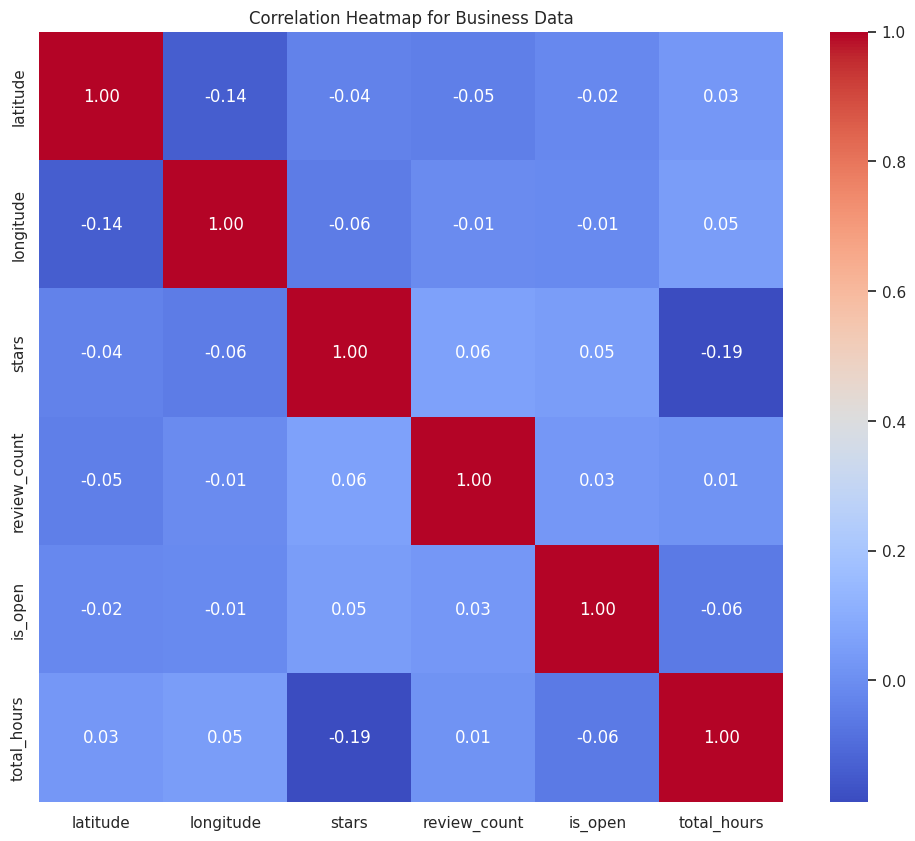

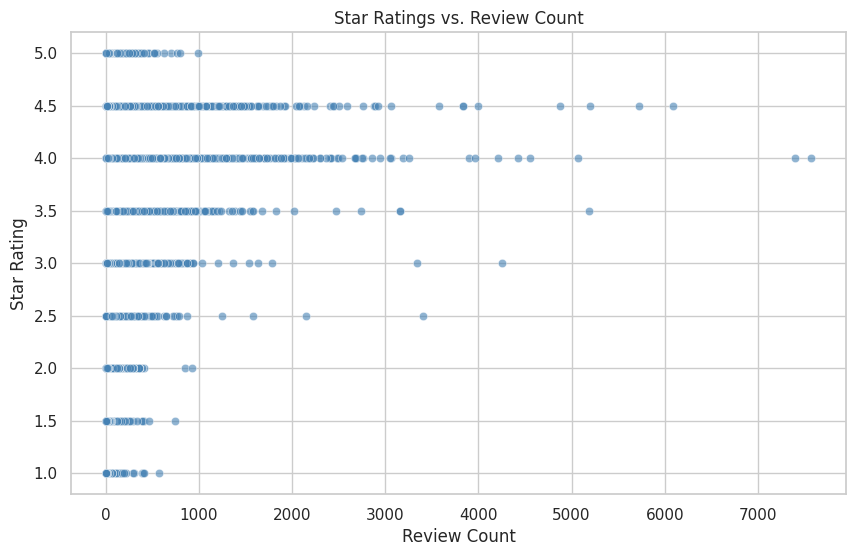

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


business = pd.read_csv("clean_business.csv")
review   = pd.read_csv("clean_review.csv")
user     = pd.read_csv("clean_user.csv")


if 'Unnamed: 0' in business.columns:
    business = business.drop(columns=['Unnamed: 0'])


plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=business, color="steelblue")
plt.title("Distribution of Business Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='stars', data=review, color="salmon")
plt.title("Distribution of Review Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.show()


business['categories_list'] = business['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
categories_exploded = business.explode('categories_list')
top_categories = categories_exploded['categories_list'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.title("Top 10 Business Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


numeric_cols = business.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Business Data")
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='review_count', y='stars', data=business, color="steelblue", alpha=0.6)
plt.title("Star Ratings vs. Review Count")
plt.xlabel("Review Count")
plt.ylabel("Star Rating")
plt.show()
